In [1]:
# !nvidia-smi
# !pip install keras
# !pip install torch
# !pip install tensorflow-gpu


NameError: name 'tf' is not defined

In [3]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10 as cifar
from tensorflow.python.client import device_lib
from tensorflow.keras.utils import to_categorical as one_hot
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# tf.config.get_visible_devices()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  1
Num CPUs Available:  1


2021-12-17 21:21:48.612111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 21:21:48.631972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 21:21:48.632220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [5]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

X_train[14728]:


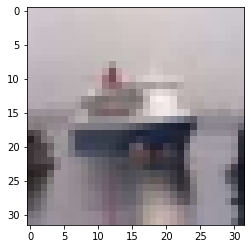

X_train[48546]:


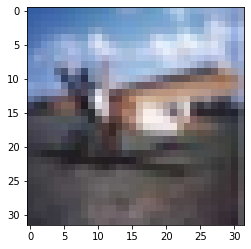

X_train[37309]:


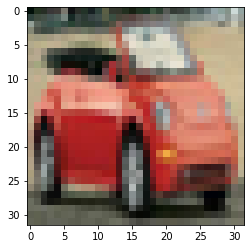

In [6]:
for i in np.random.randint(len(X_train), size=3):
    print(f"X_train[{i}]:")
    plt.imshow(X_train[i] , cmap='gray')
    plt.show()

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the data: using Z-score
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std + 1e-10 # 1e-10 is to avoid zero division
X_test = (X_test - X_train_mean) / X_train_std + 1e-10

In [8]:
# We need to one-hot encode the labels for the softmax classifier in the output layer
Y_train = one_hot(y_train, 10)
Y_test = one_hot(y_test, 10)

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

# 4th convolutional layer
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.55))

# Flatten the output of the convolutional layers into a 1D vector for the fully connected layers
model.add(Flatten())
# Fully connected layer for the final classification
model.add(Dense(10, activation='softmax'))

2021-12-17 21:22:00.776581: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-17 21:22:00.777360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 21:22:00.777539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 21:22:00.777673: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [11]:
# We perform data augmentation to avoid overfitting
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False)
datagen.fit(X_train)

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Time to train the model!
history = model.fit(datagen.flow(X_train, Y_train, batch_size=64), epochs=75, steps_per_epoch=X_train.shape[0] // 64, verbose=1, validation_data=(X_test, Y_test))

# Saving this model
model.save('cifar10_model.h5')



Epoch 1/75
781/781 [==============================] - 11s 13ms/step - loss: 1.3543 - accuracy: 0.6013 - val_loss: 1.3123 - val_accuracy: 0.6357
Epoch 2/75
781/781 [==============================] - 10s 13ms/step - loss: 1.2312 - accuracy: 0.6496 - val_loss: 1.0827 - val_accuracy: 0.7020
Epoch 3/75
781/781 [==============================] - 10s 13ms/step - loss: 1.1598 - accuracy: 0.6799 - val_loss: 1.0696 - val_accuracy: 0.7333
Epoch 4/75
781/781 [==============================] - 10s 13ms/step - loss: 1.1208 - accuracy: 0.6986 - val_loss: 1.0145 - val_accuracy: 0.7329
Epoch 5/75
781/781 [==============================] - 10s 13ms/step - loss: 1.0725 - accuracy: 0.7174 - val_loss: 0.9696 - val_accuracy: 0.7491
Epoch 6/75
781/781 [==============================] - 10s 13ms/step - loss: 1.0450 - accuracy: 0.7302 - val_loss: 0.9461 - val_accuracy: 0.7632
Epoch 7/75
781/781 [==============================] - 11s 13ms/step - loss: 1.0212 - accuracy: 0.7406 - val_loss: 1.1217 - val_accuracy:

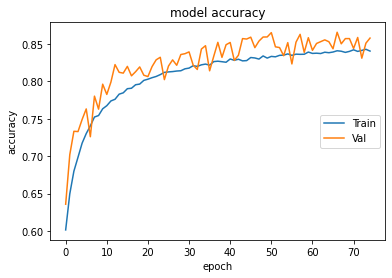

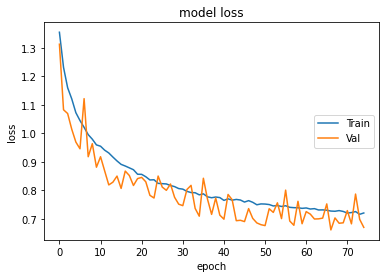

In [14]:
# Let's see how the model did:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Train","Val"], loc='center right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["Train","Val"], loc='center right')
plt.show()

Filter 0 shape: (3, 3, 32)


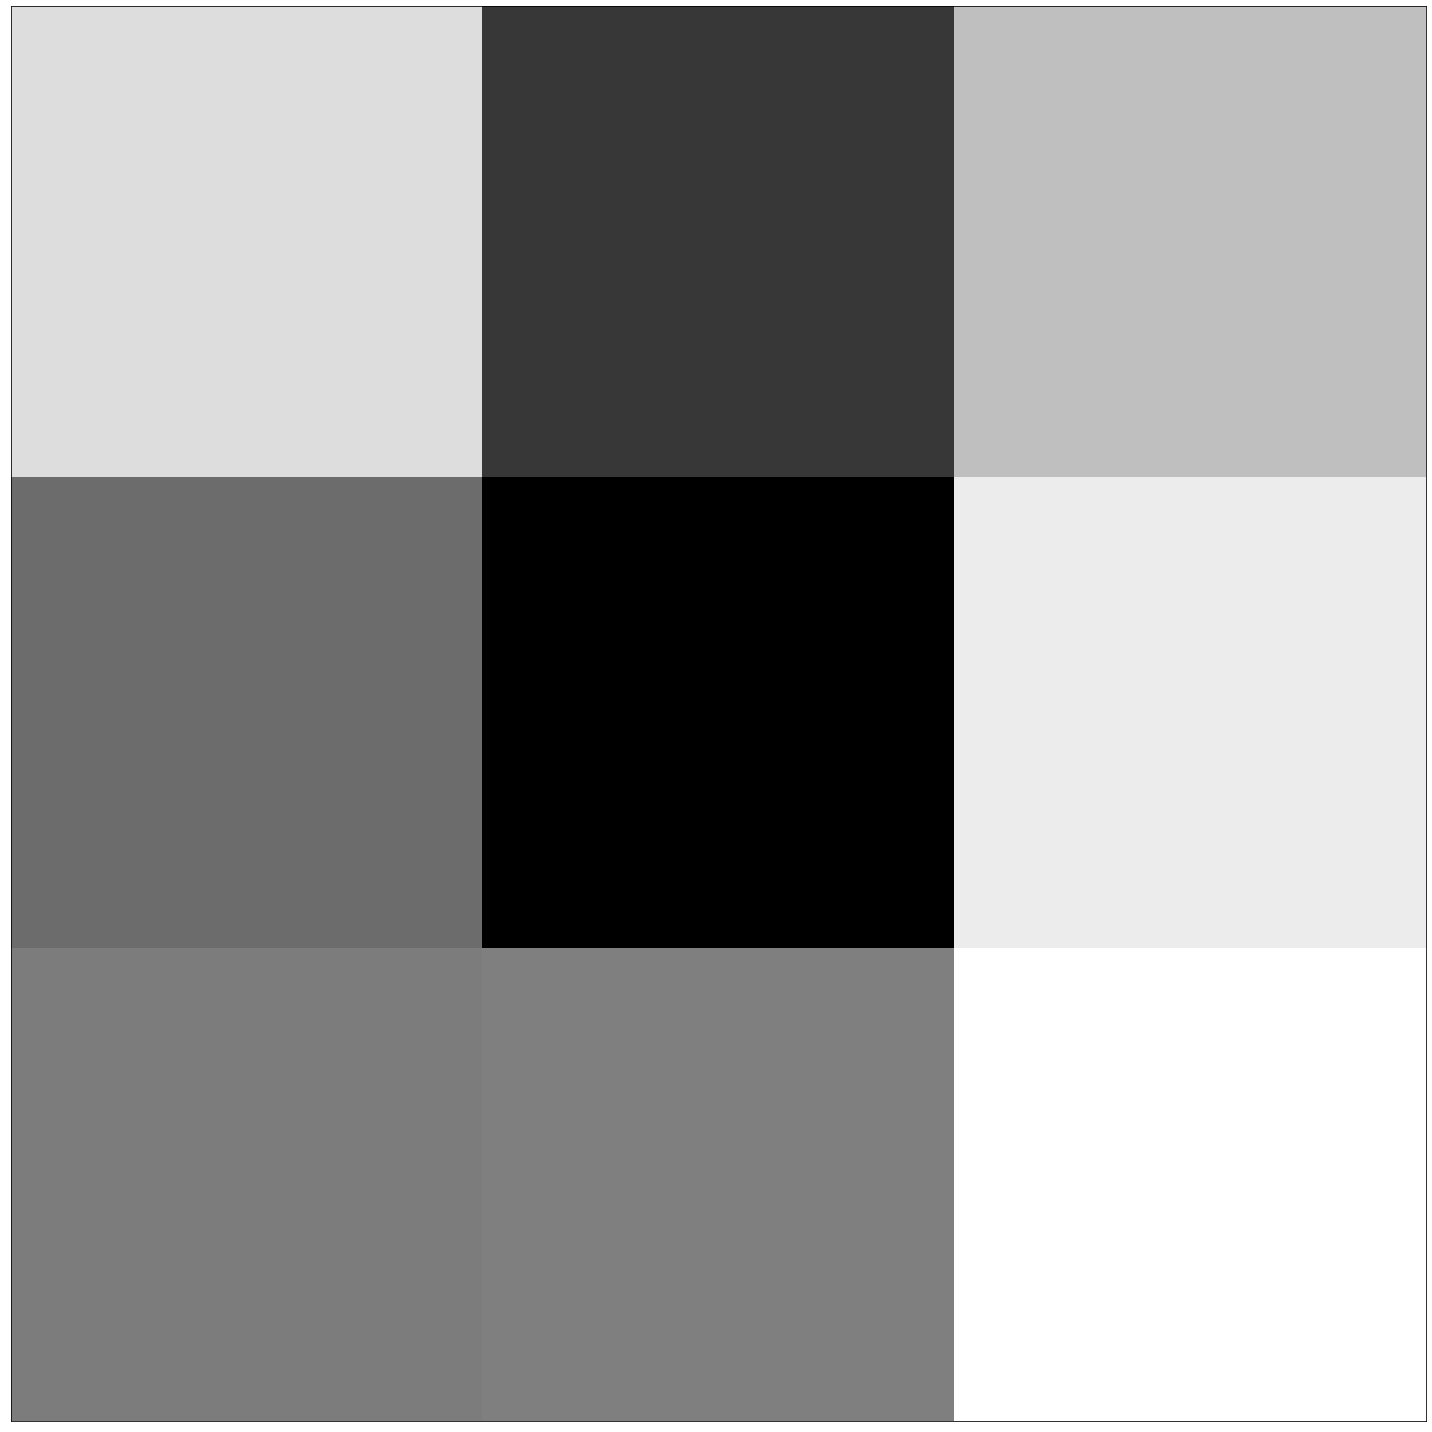

Filter 1 shape: (3, 3, 32)


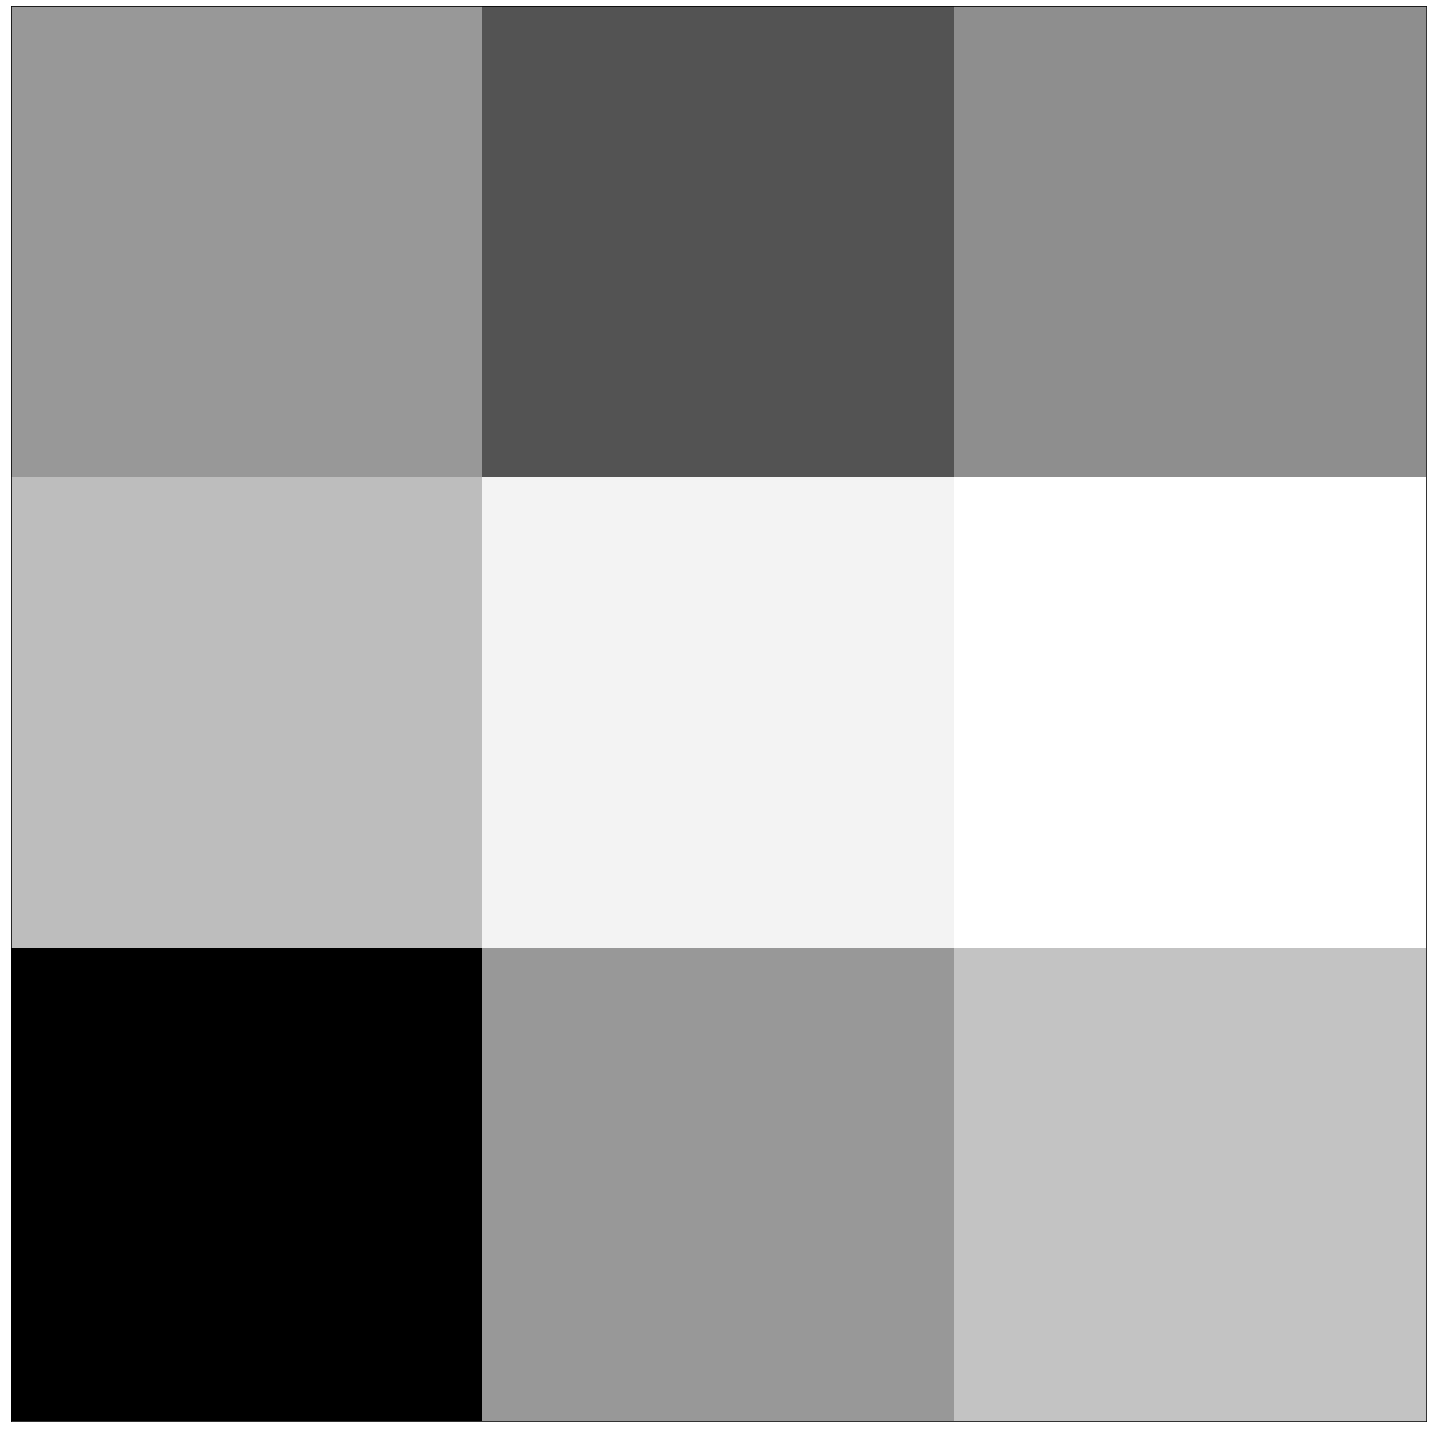

Filter 2 shape: (3, 3, 32)


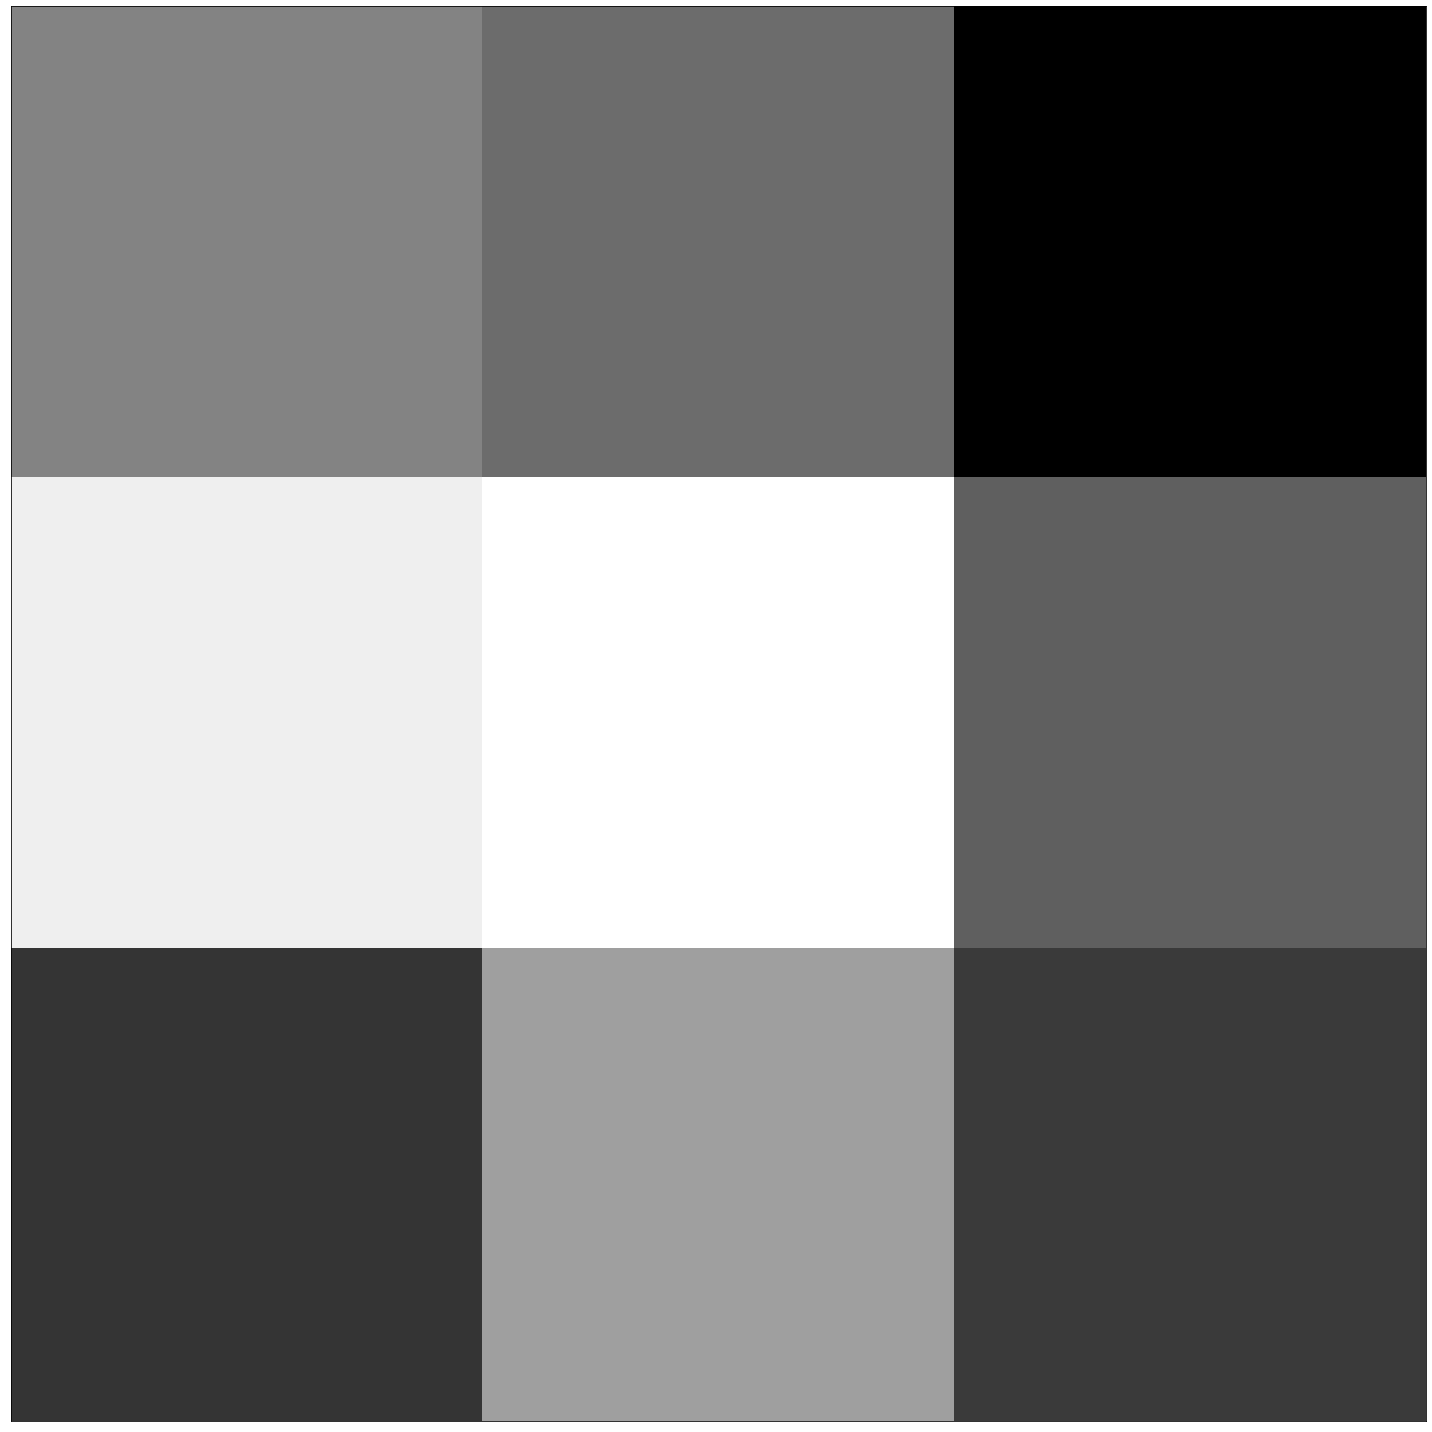

Filter 0 shape: (3, 32, 32)


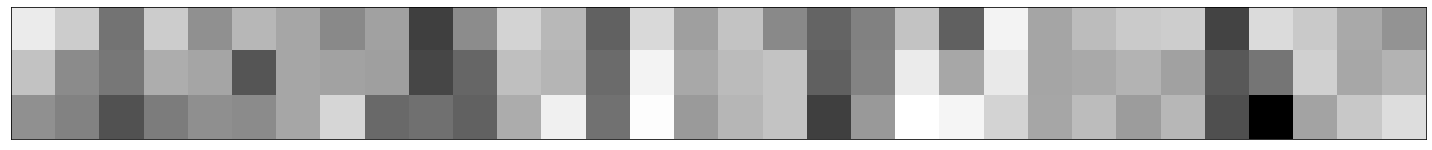

Filter 1 shape: (3, 32, 32)


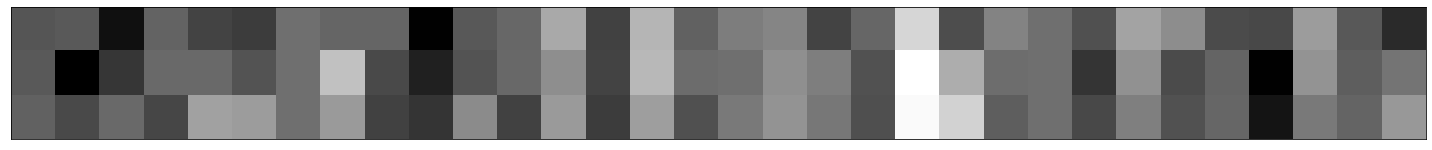

Filter 2 shape: (3, 32, 32)


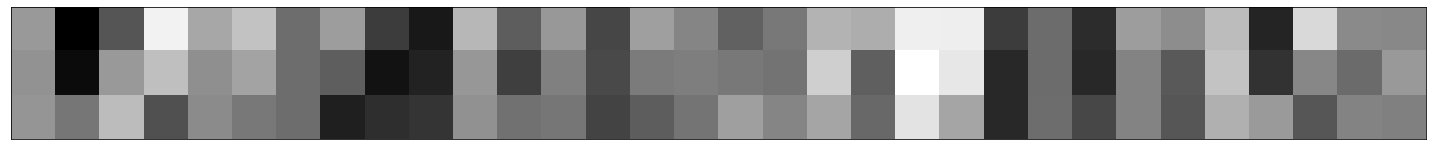

Filter 0 shape: (3, 32, 64)


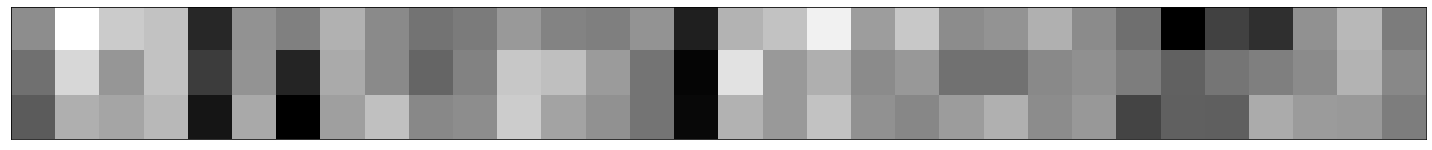

Filter 1 shape: (3, 32, 64)


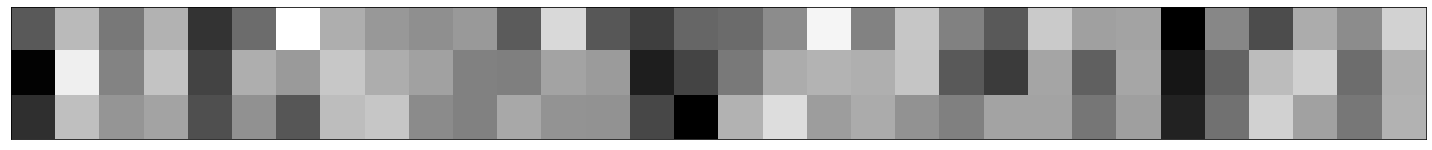

Filter 2 shape: (3, 32, 64)


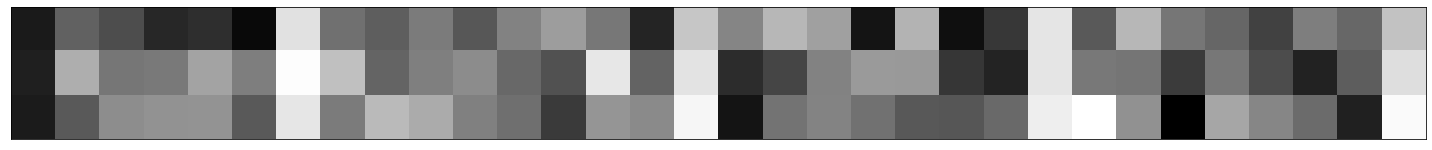

Filter 0 shape: (3, 64, 64)


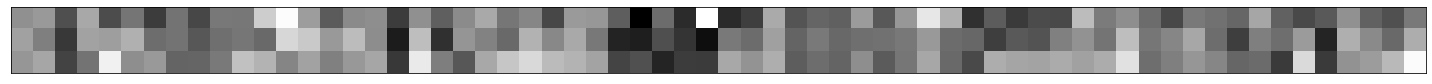

Filter 1 shape: (3, 64, 64)


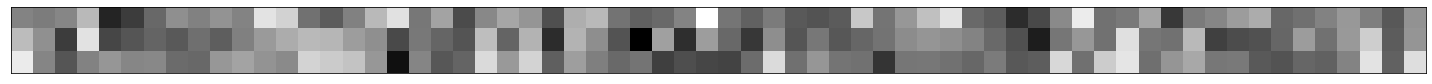

Filter 2 shape: (3, 64, 64)


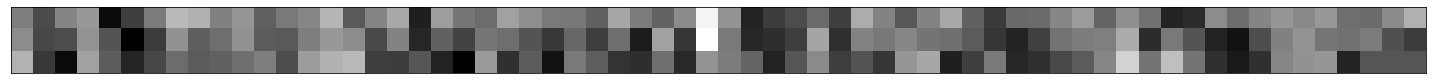

Filter 0 shape: (3, 64, 128)


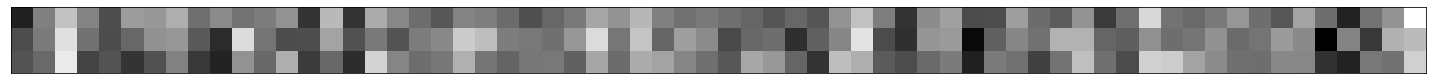

Filter 1 shape: (3, 64, 128)


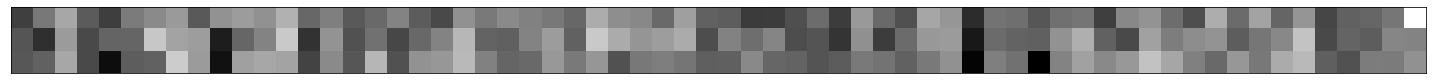

Filter 2 shape: (3, 64, 128)


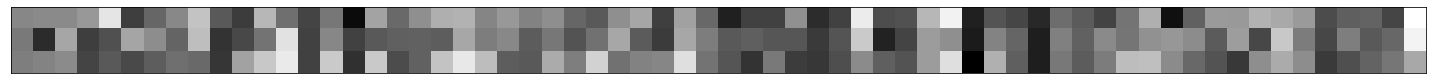

Filter 0 shape: (3, 128, 128)


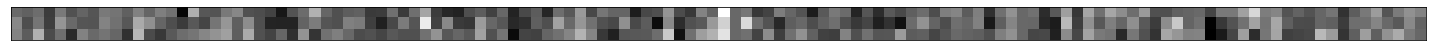

Filter 1 shape: (3, 128, 128)


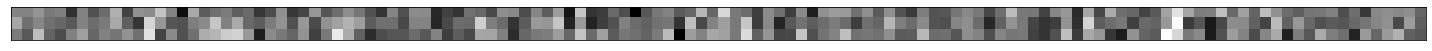

Filter 2 shape: (3, 128, 128)


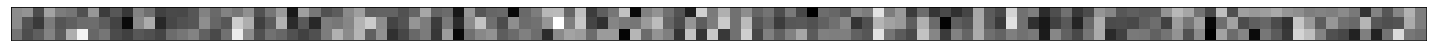

Filter 0 shape: (3, 128, 256)


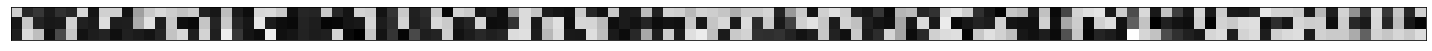

Filter 1 shape: (3, 128, 256)


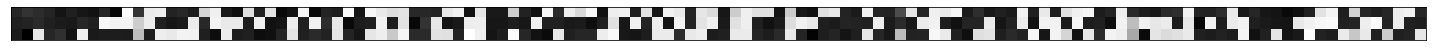

Filter 2 shape: (3, 128, 256)


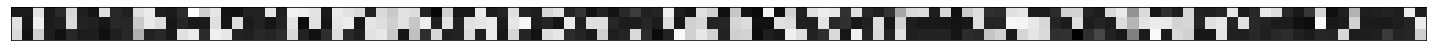

Filter 0 shape: (3, 256, 256)


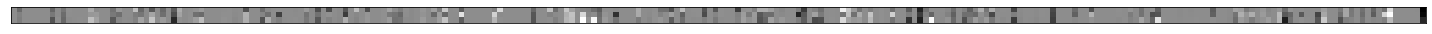

Filter 1 shape: (3, 256, 256)


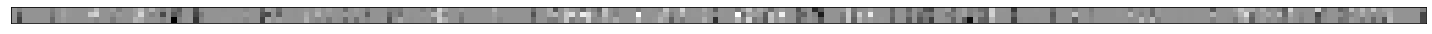

Filter 2 shape: (3, 256, 256)


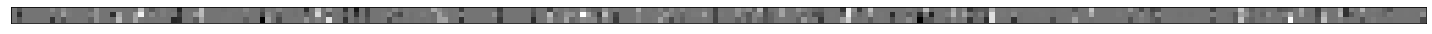

In [15]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    # plot each filter shape
    for i in range(np.shape(filters)[0]):
        # get filter shape
        shape = filters[i].shape
        print(f"Filter {i} shape: {shape}")
        # plot filter as a square
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(111)
        ax.imshow(filters[i][:, :, 0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.tight_layout()
        plt.show()

In [16]:
# Evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)

# Print the results
print("\nLoss: %.3f" % loss)
print("Accuracy: %.3f" % acc)


Loss: 0.671
Accuracy: 0.858
